In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title="", cmap="gray", size=6):
    plt.figure(figsize=(size, size))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

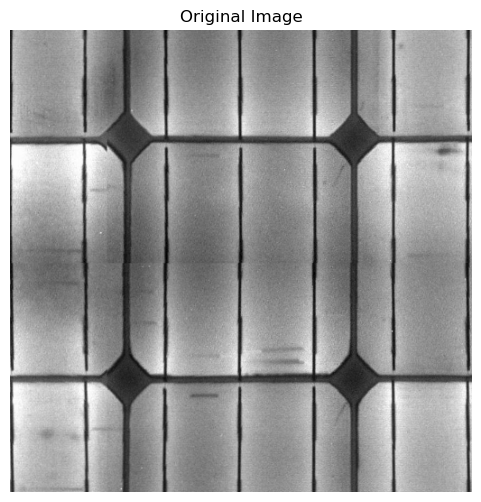

In [3]:
img = cv2.imread(r"D:\PROGRAMMING\Internships_assignments\ResearchInternIITMandi\dataset\dataset\ARTS_00007_r4_c5.png", cv2.IMREAD_GRAYSCALE)
show(img, "Original Image")

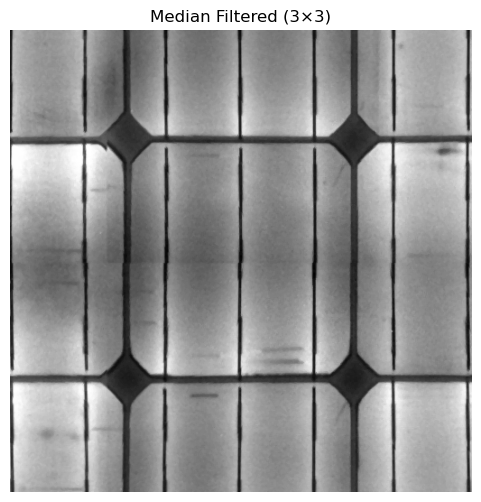

In [4]:
median = cv2.medianBlur(img, 3)
show(median, "Median Filtered (3×3)")

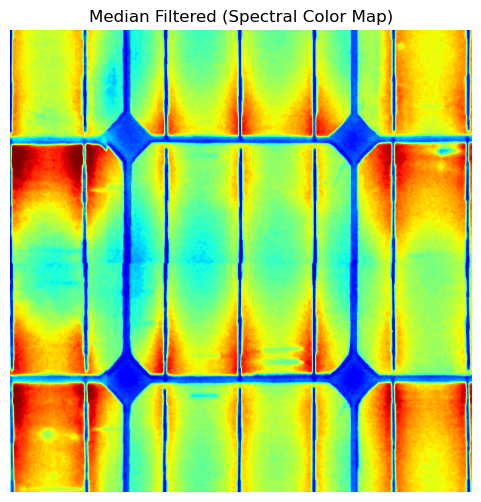

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(median, cmap="jet")
plt.title("Median Filtered (Spectral Color Map)")
plt.axis("off")
plt.show()

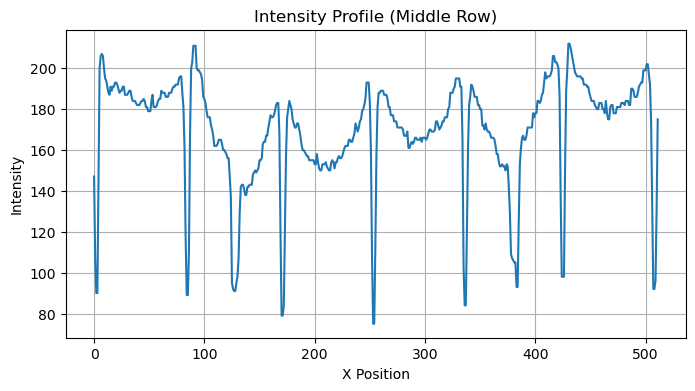

In [6]:
row = median.shape[0] - 1
profile = median[row, :]

plt.figure(figsize=(8,4))
plt.plot(profile)
plt.title("Intensity Profile (Middle Row)")
plt.xlabel("X Position")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

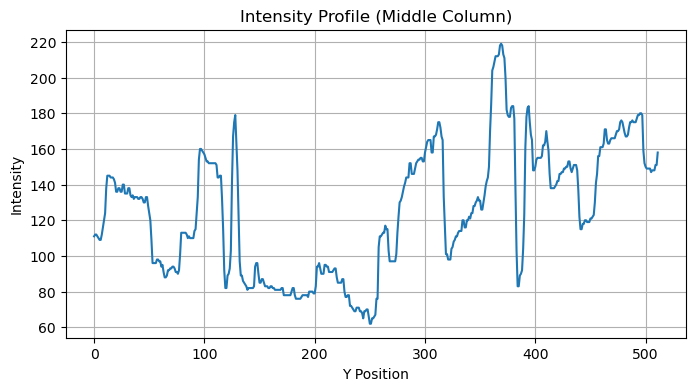

In [7]:
col = median.shape[1] // 2
profile = median[:, col]

plt.figure(figsize=(8,4))
plt.plot(profile)
plt.title("Intensity Profile (Middle Column)")
plt.xlabel("Y Position")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

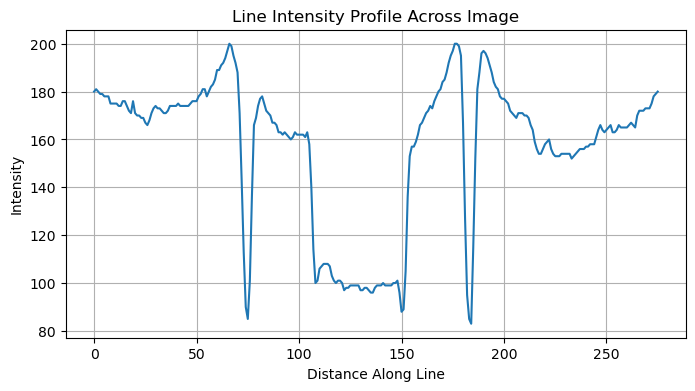

In [8]:
from skimage.measure import profile_line

p0 = (50, 20)   # start point (row, col)
p1 = (200, 250) # end point

profile = profile_line(median, p0, p1)

plt.figure(figsize=(8,4))
plt.plot(profile)
plt.title("Line Intensity Profile Across Image")
plt.xlabel("Distance Along Line")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

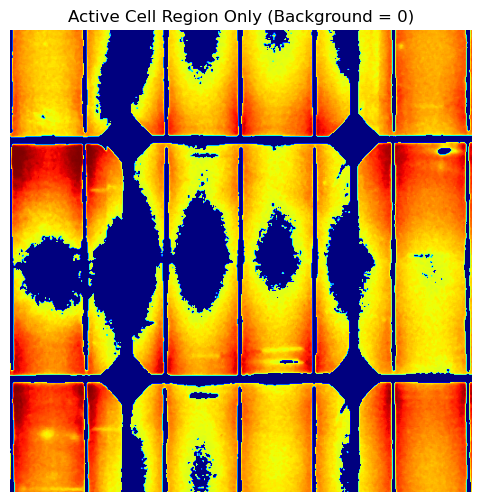

In [9]:
_, th = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mask: set background to black (0)
active_only = median.copy()
active_only[th == 0] = 0

plt.figure(figsize=(6,6))
plt.imshow(active_only, cmap="jet")
plt.title("Active Cell Region Only (Background = 0)")
plt.axis("off")
plt.show()

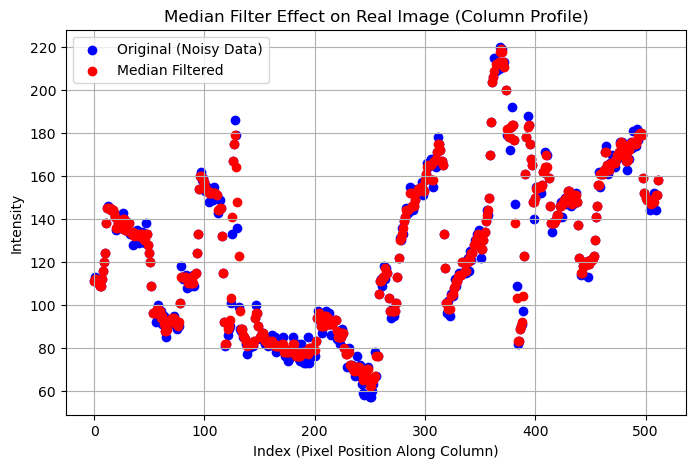

In [10]:
col = median.shape[1] // 2    # middle column

raw_profile    = img[:, col]   # before median filter
filt_profile   = median[:, col]
x = np.arange(len(raw_profile))

plt.figure(figsize=(8,5))

plt.scatter(x, raw_profile, color="blue", label="Original (Noisy Data)")
plt.scatter(x, filt_profile, color="red", label="Median Filtered")

plt.title("Median Filter Effect on Real Image (Column Profile)")
plt.xlabel("Index (Pixel Position Along Column)")
plt.ylabel("Intensity")
plt.grid(True)
plt.legend()

plt.show()


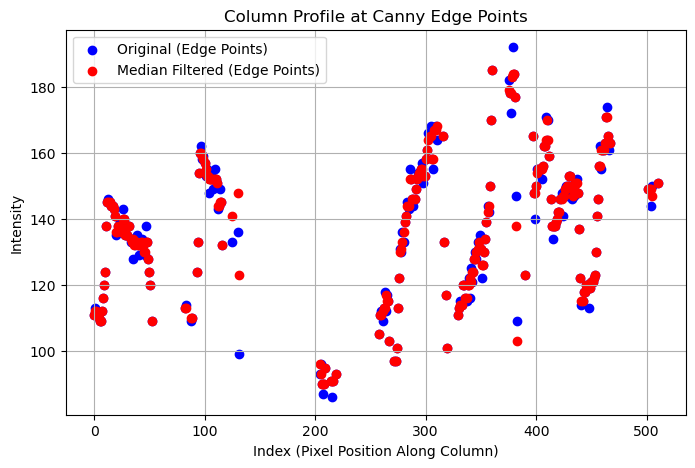

In [11]:
edges = cv2.Canny(img.astype(np.uint8), 50, 150)
col = median.shape[1] // 2

edge_column = edges[:, col]          # 1-D edge mask along the column
raw_profile  = img[:, col]
filt_profile = median[:, col]
x = np.arange(len(raw_profile))
edge_positions = np.where(edge_column > 0)[0]

edge_intensity_raw  = raw_profile[edge_positions]
edge_intensity_filt = filt_profile[edge_positions]
plt.figure(figsize=(8,5))

# Raw
plt.scatter(edge_positions, edge_intensity_raw, 
            color="blue", label="Original (Edge Points)")

# Median-filtered
plt.scatter(edge_positions, edge_intensity_filt, 
            color="red", label="Median Filtered (Edge Points)")

plt.title("Column Profile at Canny Edge Points")
plt.xlabel("Index (Pixel Position Along Column)")
plt.ylabel("Intensity")
plt.grid(True)
plt.legend()

plt.show()


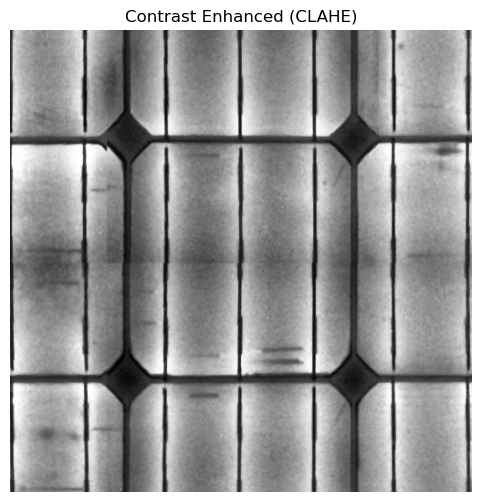

In [12]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(median)
show(enhanced, "Contrast Enhanced (CLAHE)")

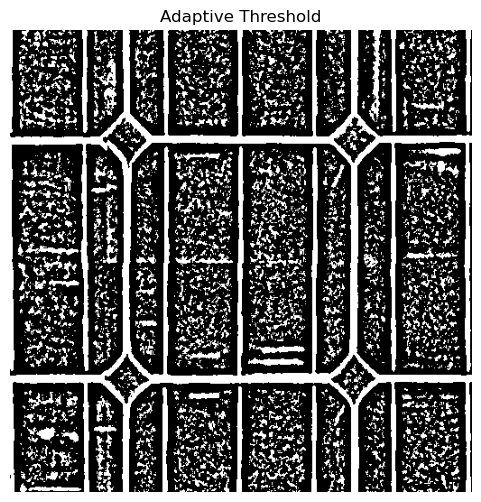

In [13]:
th = cv2.adaptiveThreshold(enhanced, 255,
                           cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY_INV,
                           15, 5)
show(th, "Adaptive Threshold")

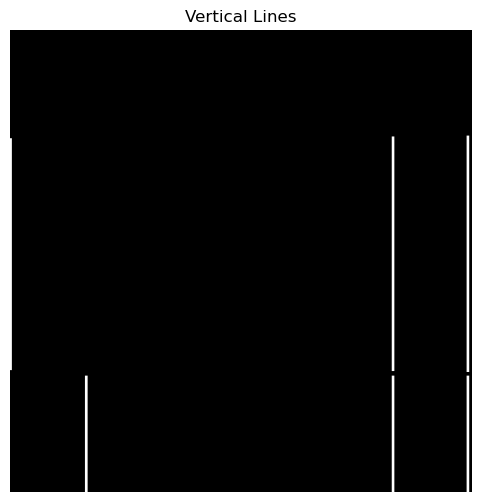

In [14]:
kernel_vert = cv2.getStructuringElement(cv2.MORPH_RECT, (3, img.shape[0]//2))
vert_lines = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel_vert)
show(vert_lines, "Vertical Lines")

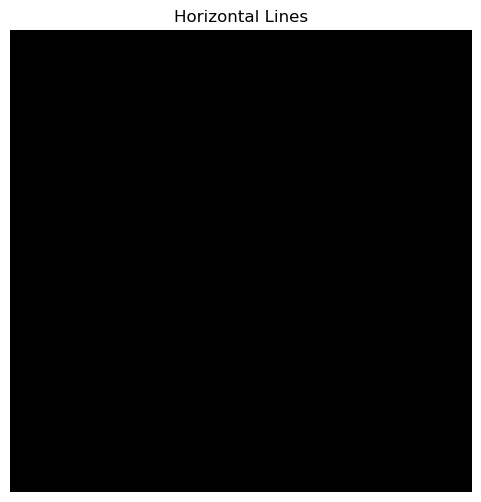

In [15]:
kernel_horz = cv2.getStructuringElement(cv2.MORPH_RECT, (img.shape[1]//2, 1))
horz_lines = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel_horz)
show(horz_lines, "Horizontal Lines")

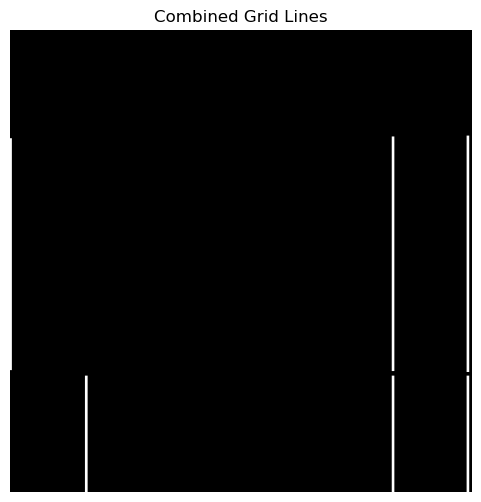

In [16]:
grid = cv2.addWeighted(vert_lines, 1, horz_lines, 1, 0)
show(grid, "Combined Grid Lines")

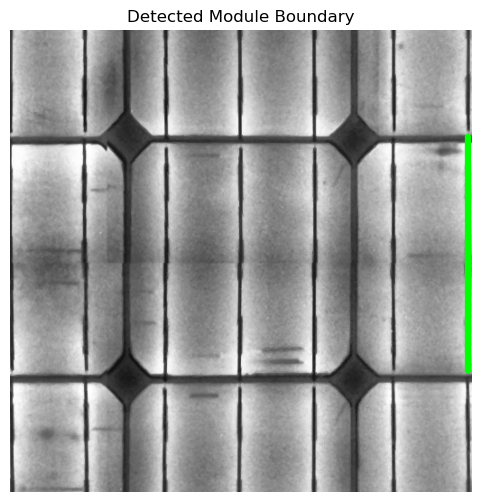

In [17]:
contours, _ = cv2.findContours(grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)
contour_img = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, [cnt], -1, (0, 255, 0), 3)
show(contour_img, "Detected Module Boundary")

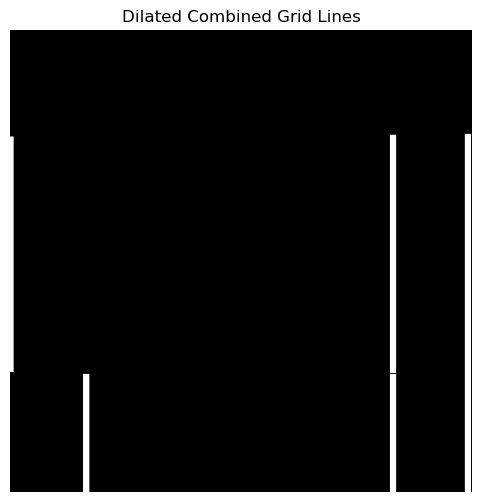

In [18]:
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
grid_dilated = cv2.dilate(grid, kernel_dilate, iterations=1)

show(grid_dilated, "Dilated Combined Grid Lines")

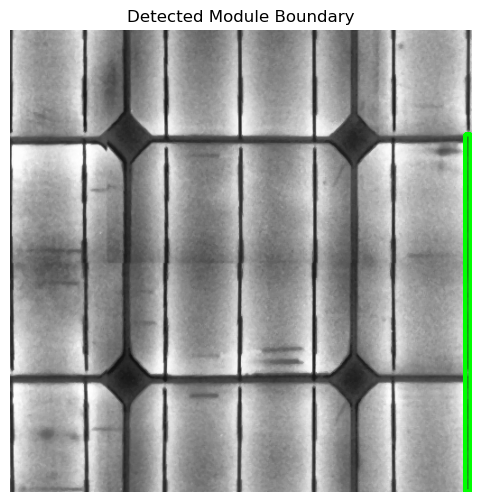

In [19]:
contours, _ = cv2.findContours(grid_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)

contour_img = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, [cnt], -1, (0, 255, 0), 3)
show(contour_img, "Detected Module Boundary")


In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
intersections_dilated = cv2.dilate(intersections, kernel, iterations=1)
show(intersections_dilated, "Dilated Grid Intersections")
_, intersections_thresh = cv2.threshold(intersections_dilated, 127, 255, cv2.THRESH_BINARY)
show(intersections_thresh, "Thresholded Intersections")
coords = cv2.findNonZero(intersections_thresh)
points = coords[:,0,:]

NameError: name 'intersections' is not defined

In [ ]:
intersections = cv2.bitwise_and(vert_lines, horz_lines)
show(intersections, "Grid Intersections")

In [93]:
coords = cv2.findNonZero(intersections_thresh)
points = coords[:, 0, :]

# Find the convex hull of the intersection points
hull = cv2.convexHull(points)

# Convert hull to Nx2 array
hull_points = hull[:, 0, :]

# Order points in hull as top-left, top-right, bottom-right, bottom-left
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)

    rect[0] = pts[np.argmin(s)]      # top-left
    rect[2] = pts[np.argmax(s)]      # bottom-right
    rect[1] = pts[np.argmin(diff)]   # top-right
    rect[3] = pts[np.argmax(diff)]   # bottom-left

    return rect

corners = order_points(hull_points)

print("Corners:")
print("Top-left:", corners[0])
print("Top-right:", corners[1])
print("Bottom-right:", corners[2])
print("Bottom-left:", corners[3])

Corners:
Top-left: [152. 133.]
Top-right: [378. 143.]
Bottom-right: [371. 407.]
Bottom-left: [148. 399.]


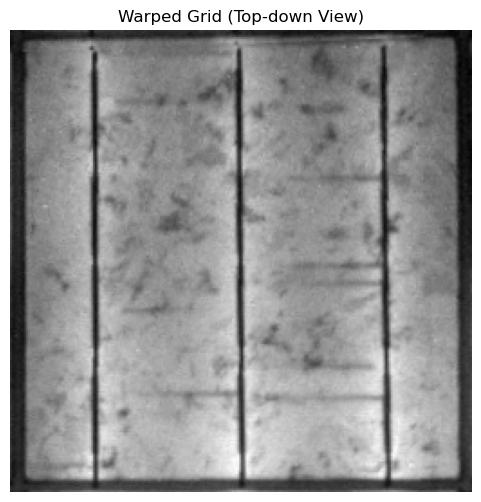

In [95]:
top_left = np.array(corners[0])
top_right = np.array(corners[1])
bottom_right = np.array(corners[2])
bottom_left = np.array(corners[3])

src_pts = np.array([top_left, top_right, bottom_right, bottom_left], dtype=np.float32)

# Define size of output rectangle (for example 256x256 pixels)
width, height = 256, 256
dst_pts = np.array([[0,0], [width-1,0], [width-1,height-1], [0,height-1]], dtype=np.float32)

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Apply the warp perspective to your image (assuming 'img' is your input image)
warped = cv2.warpPerspective(img, M, (width, height))

# Show or save the warped image (middle cell top-down view)
show(warped, "Warped Grid (Top-down View)")


In [55]:
# Find coordinates of all intersections
ys, xs = np.where(intersections > 0)

# Outer corners
top_left     = (np.min(xs), np.min(ys))
top_right    = (np.max(xs), np.min(ys))
bottom_left  = (np.min(xs), np.max(ys))
bottom_right = (np.max(xs), np.max(ys))


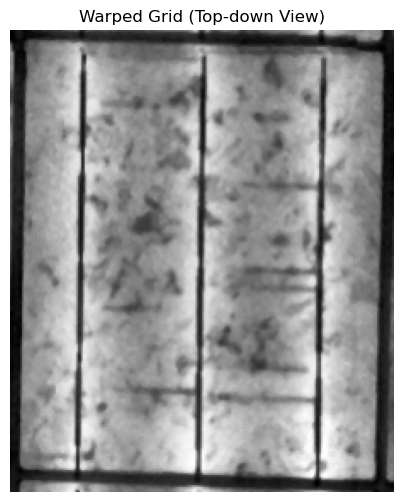

In [57]:
# Define source points (corners of the detected grid)
top_left     = np.array(top_left, dtype=np.float32)
top_right    = np.array(top_right, dtype=np.float32)
bottom_left  = np.array(bottom_left, dtype=np.float32)
bottom_right = np.array(bottom_right, dtype=np.float32)

# Define source points (corners of the detected grid)
src_pts = np.array([top_left, top_right, bottom_right, bottom_left], dtype=np.float32)

# Define destination points (aligned rectangle)
width  = int(np.linalg.norm(top_right - top_left))
height = int(np.linalg.norm(bottom_left - top_left))
dst_pts = np.array([[0,0], [width-1,0], [width-1,height-1], [0,height-1]], dtype=np.float32)

# Perspective transform matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Warp the image
warped = cv2.warpPerspective(enhanced, M, (width, height))

show(warped, "Warped Grid (Top-down View)")

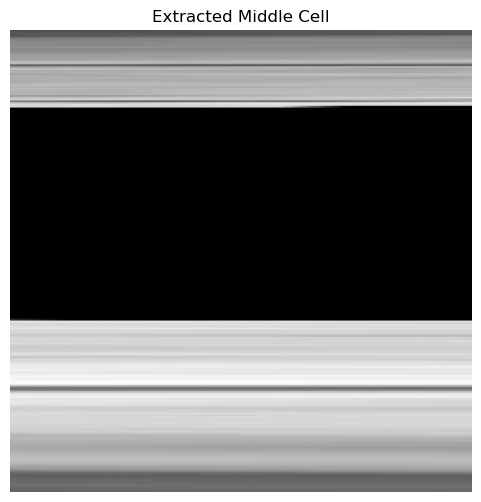

In [85]:
coords = cv2.findNonZero(intersections)
points = coords[:,0,:]  # reshape

# Cluster points into rows based on y-coordinate
points_sorted = points[np.argsort(points[:,1])]
rows = []
row = [points_sorted[0]]
for p in points_sorted[1:]:
    if abs(p[1] - row[-1][1]) < 50:  # tolerance for same row
        row.append(p)
    else:
        rows.append(row)
        row = [p]
rows.append(row)

# Sort each row by x-coordinate
for row in rows:
    row.sort(key=lambda x: x[0])

# Grid size
num_intersections_rows = len(rows)
num_intersections_cols = len(rows[0])
num_cells_rows = num_intersections_rows - 1
num_cells_cols = num_intersections_cols - 1

# Middle cell indices
mid_row = num_cells_rows // 2
mid_col = num_cells_cols // 2

# Middle cell corners
tl = rows[mid_row][mid_col]
tr = rows[mid_row][mid_col + 1]
br = rows[mid_row + 1][mid_col + 1]
bl = rows[mid_row + 1][mid_col]

src_pts = np.float32([tl, tr, br, bl])
dst_size = 256
dst_pts = np.float32([[0,0],[dst_size-1,0],[dst_size-1,dst_size-1],[0,dst_size-1]])

# Perspective transform
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
middle_cell = cv2.warpPerspective(img, M, (dst_size, dst_size))

# Display
show(middle_cell, "Extracted Middle Cell")